In [2]:
import pandas as pd
import pylab
import seaborn as sns
from glob import glob
import re

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 5),
         'axes.labelsize': 'x-large',
          'axes.labelweight': 'bold',
         'axes.titlesize':'x-large',
          'axes.titleweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/roee/workenv/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split

from scipy.special import expit, logit
import statsmodels.formula.api as smf

# MI Texas

In [3]:
fns = sorted(glob('/Users/roee/work/texas/cdc/atlas/*'))
fns

['/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_35_plus_all_gender.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_35_plus_female.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_35_plus_male.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_45_64_all_gender.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_45_64_female.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_45_64_male.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_65_plus_all_gender.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_65_plus_female.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_65_plus_male.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_death_2012_2014_all_ages_all_gender.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_discharged_acute_care_2012_2014_65_plus_all_genders.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_discharged_dead_2012_2014_65_plus_all_genders.csv',
 '/Users/roee/work/texas/cdc/atlas/mi_discharged_home_2012_

##### Let's start by comparing hospitilizations of 65+ to claims data

In [141]:
df = pd.read_csv('/Users/roee/work/texas/cdc/atlas/mi_hosp_2012_2014_65_plus_all_gender.csv').set_index('cnty_fips')
df = df.rename(columns={'Value': 'hosp_all_gender_65+_per_mil'})

In [142]:
for gender in ['male', 'female']:
    x = pd.read_csv('/Users/roee/work/texas/cdc/atlas/mi_hosp_2012_2014_65_plus_{}.csv'.format(gender))
    df['hosp_{}_65+_per_mil'.format(gender)] = x.set_index('cnty_fips')['Value']

In [143]:
df = df.replace(-1, nan)

In [144]:
df.shape

(254, 57)

In [145]:
df.head()

,display_name,hosp_all_gender_65+_per_mil,theme_range,dm_prev_adj,ob_prev_adj,ltpia_prev_adj,no_hsdip,no_college,female_hd,foodstmp,...,inp_cost,ou_cost,pac_cost,total_inc,inp_inc,ou_inc,pac_inc,prev_hd,hosp_male_65+_per_mil,hosp_female_65+_per_mil
cnty_fips,,,,,,,,,,,,,,,,,,,,,
48001,"""Anderson, (TX)""",11.9,9.9 - 15.7 (35),11.3,31.4,25.4,19.8,88.6,16.7,13.6,...,7010,3411,6890,13756,4378,1937,4214,24.3,15.5,9.3
48003,"""Andrews, (TX)""",7.4,6.7 - 7.8 (37),8.9,27.8,23.9,23.2,86.3,12.9,12.2,...,4874,3279,4366,10691,3194,1982,3204,16.0,NaN,NaN
48005,"""Angelina, (TX)""",8.9,8.8 - 9.8 (40),11.7,37.5,28.6,20.7,84.6,21.3,20.6,...,6575,3003,7625,14410,4040,1699,4929,21.8,10.7,7.7
48007,"""Aransas, (TX)""",5.0,4.9 - 6.6 (40),8.8,26.6,21.7,15.6,80.5,12.5,17.3,...,4753,2381,5151,11227,3051,1496,3594,16.7,7.0,NaN
48009,"""Archer, (TX)""",9.1,8.8 - 9.8 (40),8.5,26.4,23.9,12.7,79.7,6.2,5.8,...,5650,1871,6468,11291,3021,670,3804,24.1,NaN,NaN


In [146]:
df['county'] = df.display_name.str.replace(', \(TX\)', '').str.replace('\"', '')

In [10]:
print '\n'.join(df.columns)

display_name
hosp_all_gender_65+_per_mil
theme_range
dm_prev_adj
ob_prev_adj
ltpia_prev_adj
no_hsdip
no_college
female_hd
foodstmp
home_val
income
GINI
povpct
unemploy
perc_aian
perc_api
perc_black
perc_white
perc_hisp
perc_65up
total_pop
airqual
PARKS
sev_housing
NCHS_collapse
htnadh_all
htnadh_white
htnadh_black
htnadh_api
htnadh_aian
htnadh_hisp
diuradh
rasadh
stg_hosp
stg_int_cr
stg_rehab
stg_emerg
stg_neuro
pharmpc
prim_dr
cvd_dr
neuro_dr
surg_dr
pctui
medicaid
total_cost
inp_cost
ou_cost
pac_cost
total_inc
inp_inc
ou_inc
pac_inc
prev_hd
hosp_male_65+_per_mil
hosp_female_65+_per_mil
county


In [147]:
df_rates = df[[c for c in df.columns if c.startswith('hosp') or c == 'county']]
df_rates = df_rates.reset_index().set_index('county')

In [148]:
df_rates

,cnty_fips,hosp_all_gender_65+_per_mil,hosp_male_65+_per_mil,hosp_female_65+_per_mil
county,,,,
Anderson,48001,11.9,15.5,9.3
Andrews,48003,7.4,NaN,NaN
Angelina,48005,8.9,10.7,7.7
Aransas,48007,5.0,7.0,NaN
Archer,48009,9.1,NaN,NaN
Armstrong,48011,NaN,NaN,NaN
Atascosa,48013,11.6,13.7,9.9
Austin,48015,7.8,10.9,5.4
Bailey,48017,NaN,NaN,NaN


In [13]:
df_claims_rate = pd.read_csv('~/work/texas/claims/rate_280_285_by_county_65+.csv', header=None)
df_claims_rate = df_claims_rate.rename(columns={0: 'county', 1: 'claims_drg_rate'})
df_claims_rate.county = df_claims_rate.county.str.replace(', Texas', '')
df_claims_rate = df_claims_rate.set_index('county')

In [14]:
df_claims_rate.head(3)

,claims_drg_rate
county,
Anderson,0.734797
Andrews,0.707563
Angelina,0.418101


In [15]:
df_rates['claims_drg'] = (df_claims_rate.claims_drg_rate * 10).round(1)

In [16]:
claims_icd = pd.read_csv('/Users/roee/work/texas/series_mi_icd_65+_rate.csv', header=None)
claims_icd = claims_icd.rename(columns={0: 'county', 1: 'claims_icd'})

claims_icd['county'] = claims_icd.county.str.replace(', Texas', '')
claims_icd = claims_icd.set_index('county')

In [17]:
df_rates['claims_icd'] = (claims_icd * 10).round(1)

In [18]:
county_pop = pd.read_csv('/Users/roee/work/texas/county_pop_2012.csv', header=None)
county_pop = county_pop.rename(columns={0: 'county', 1: 'claims_icd'})
county_pop.county = county_pop.county.str.replace(', Texas', '')
county_pop = county_pop.set_index('county')
df_rates['population'] = county_pop.round(0)

In [19]:
df_rates = df_rates.sort_values('population', ascending=False)

In [20]:
df_rates.head(20)

,cnty_fips,hosp_all_gender_65+_per_mil,hosp_male_65+_per_mil,hosp_female_65+_per_mil,claims_drg,claims_icd,population
county,,,,,,,
Harris,48201,7.1,8.4,6.1,2.8,8.8,4243880.0
Dallas,48113,5.9,7.5,4.8,2.4,8.5,2427342.0
Tarrant,48439,7.5,9.5,5.9,2.5,8.8,1875968.0
Bexar,48029,6.7,7.9,5.7,2.7,10.2,1785079.0
Travis,48453,5.1,6.4,4.2,1.3,5.5,1072407.0
El Paso,48141,4.9,6.2,3.8,1.6,7.7,835075.0
Collin,48085,6.0,7.7,4.8,2.0,7.3,827717.0
Hidalgo,48215,8.0,9.5,6.6,3.5,10.6,811958.0
Denton,48121,6.9,9.3,5.0,2.0,6.5,704359.0


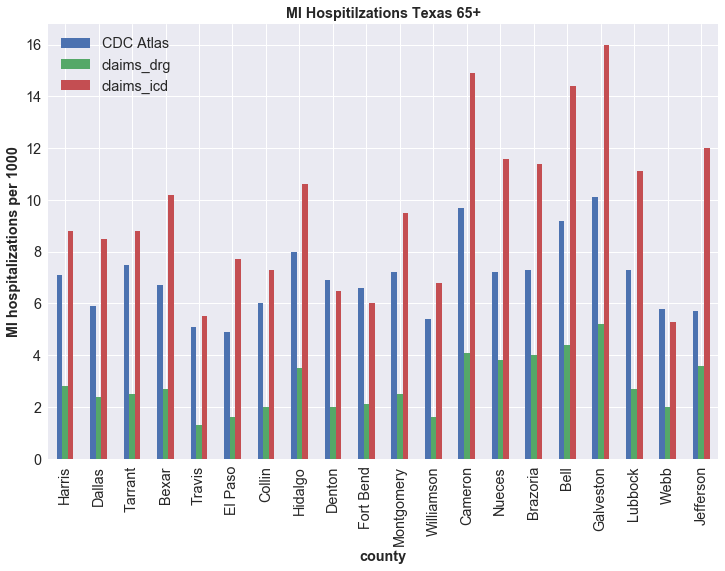

In [23]:
x = df_rates.rename(columns={'hosp_all_gender_65+_per_mil': 'CDC Atlas'})[['CDC Atlas', 'claims_drg', 'claims_icd']].iloc[:20, ]
x.plot(kind='bar', figsize=(12,8))
ylabel('MI hospitalizations per 1000')
title('MI Hospitilzations Texas 65+')

# All types of CVD

In [149]:
import re

In [643]:
fns = glob('/Users/roee/work/cdc/tables/*csv')
fns

['/Users/roee/work/cdc/tables/65_plus_percent_2012_2014.csv',
 '/Users/roee/work/cdc/tables/all_features_2012_2014.csv',
 '/Users/roee/work/cdc/tables/hosp_acute_mi_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_all_stroke_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_cardiac_dysrhythmia_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_coronary_heart_disease_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_heart_failure_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_hemorrhagic_stroke_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_hypertension_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_ischemic_stroke_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_total_cvd_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_total_heart_disease_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/total_population_2012_2014.csv']

In [644]:
dfs = []
for fn in fns:
    if 'all_features' in fn:
        continue
    name = re.search(r'tables/(.*)_2012_2014', fn).group(1)
    df = pd.read_csv(fn, usecols=('cnty_fips', 'display_name', 'Value'))
    df = df.rename(columns={'display_name': 'county_name', 'Value': name, 'cnty_fips': 'fips'})
    df = df.set_index('fips')
    dfs.append(df)

x = pd.read_csv('/Users/roee/work/cdc/tables/all_features_2012_2014.csv')
x = x.rename(columns={'display_name': 'county_name', 'cnty_fips': 'fips'})
del x['Value']
del x['theme_range']
x = x.set_index('fips')
dfs.append(x)

df = pd.concat(dfs, axis=1).T.drop_duplicates().T
df = df.replace(-1, nan)

for c in df.columns:
    if c == 'county_name':
        continue
    df[c] = df[c].astype('float')

In [647]:
print '\n'.join(df.columns)

county_name
65_plus_percent
hosp_acute_mi
hosp_all_stroke
hosp_cardiac_dysrhythmia
hosp_coronary_heart_disease
hosp_heart_failure
hosp_hemorrhagic_stroke
hosp_hypertension
hosp_ischemic_stroke
hosp_total_cvd
hosp_total_heart_disease
total_population
dm_prev_adj
ob_prev_adj
ltpia_prev_adj
no_hsdip
no_college
female_hd
foodstmp
home_val
income
GINI
povpct
unemploy
perc_aian
perc_api
perc_black
perc_white
perc_hisp
airqual
PARKS
sev_housing
NCHS_collapse
htnadh_all
htnadh_white
htnadh_black
htnadh_api
htnadh_aian
htnadh_hisp
diuradh
rasadh
stg_hosp
stg_int_cr
stg_rehab
stg_emerg
stg_neuro
pharmpc
prim_dr
cvd_dr
neuro_dr
surg_dr
pctui
medicaid
total_cost
inp_cost
ou_cost
pac_cost
total_inc
inp_inc
ou_inc
pac_inc
prev_hd


In [648]:
df.head(3)

,county_name,65_plus_percent,hosp_acute_mi,hosp_all_stroke,hosp_cardiac_dysrhythmia,hosp_coronary_heart_disease,hosp_heart_failure,hosp_hemorrhagic_stroke,hosp_hypertension,hosp_ischemic_stroke,...,medicaid,total_cost,inp_cost,ou_cost,pac_cost,total_inc,inp_inc,ou_inc,pac_inc,prev_hd
fips,,,,,,,,,,,,,,,,,,,,,
1001,"""Autauga, (AL)""",13.2,7.3,12.2,11.5,15.5,16.8,NaN,3.8,10.6,...,15.5,18543.0,6398.0,2933.0,4254.0,9789.0,3889.0,904.0,2793.0,20.1
1003,"""Baldwin, (AL)""",17.6,5.8,12.9,13.6,13.9,14.0,1.8,1.2,10.3,...,13.2,16865.0,5241.0,3015.0,3220.0,9258.0,3061.0,1574.0,2021.0,20.2
1005,"""Barbour, (AL)""",15.4,7.6,12.6,12.4,13.8,18.2,2.1,5.3,9.5,...,25.9,18589.0,6255.0,2744.0,3974.0,10175.0,3816.0,1346.0,2311.0,20.1


In [649]:
sum(df.hosp_acute_mi * df.total_population * df['65_plus_percent'] / 1000.0 / 100)

323113.63501699996

In [650]:
x = sum(df.total_population * df['65_plus_percent']) / 100
print '{:.0f} ({:.1f}%) of US pop is 65+'.format(x, 100.0 * x / df.total_population.sum())

43604452 (13.7%) of US pop is 65+


In [651]:
sum(df.hosp_total_cvd * df.total_population / 1000.0)

19562134.897100002

In [652]:
df.shape

(3225, 63)

In [653]:
df['log_pop'] = df.total_population.apply(lambda x:log10(x))

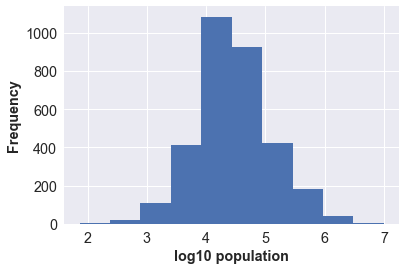

In [654]:
df.log_pop.sort_values(ascending=False).plot(kind='hist')
xlabel('log10 population')

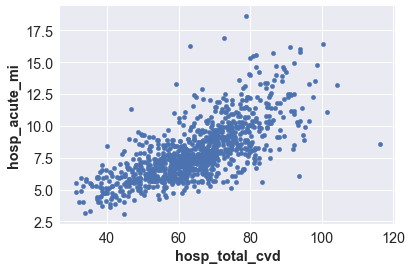

In [84]:
df[df.total_population > 50000].plot(kind='scatter', x='hosp_total_cvd', y='hosp_acute_mi')

In [104]:
# # convert to json for sending to the visualization
# jsonstr = df.to_json(orient='records')

# # Display the Dive visualization for this data
# from IPython.core.display import display, HTML

# HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
#         <facets-dive id="elem" height="600"></facets-dive>
#         <script>
#           var data = {jsonstr};
#           document.querySelector("#elem").data = data;
#         </script>"""
# html = HTML_TEMPLATE.format(jsonstr=jsonstr)
# display(HTML(html))

# prevalence of under 65 CVD

##### add state level

In [189]:
df['state'] = df.county_name.str.extract(r'([A-Z]{2})', expand=False)

#####  65+ CVD hospitilizations

In [114]:
df.head()

,county_name,65_plus_percent,hosp_acute_mi,hosp_all_stroke,hosp_cardiac_dysrhythmia,hosp_coronary_heart_disease,hosp_heart_failure,hosp_hemorrhagic_stroke,hosp_hypertension,hosp_ischemic_stroke,hosp_total_cvd,hosp_total_heart_disease,total_population,log_pop,state
fips,,,,,,,,,,,,,,,
1001,"""Autauga, (AL)""",13.2,7.3,12.2,11.5,15.5,16.8,NaN,3.8,10.6,67.8,50.3,55136.0,4.741435,AL
1003,"""Baldwin, (AL)""",17.6,5.8,12.9,13.6,13.9,14.0,1.8,1.2,10.3,68.4,48.9,191205.0,5.281499,AL
1005,"""Barbour, (AL)""",15.4,7.6,12.6,12.4,13.8,18.2,2.1,5.3,9.5,70.9,52.0,27119.0,4.433274,AL
1007,"""Bibb, (AL)""",14.1,11.8,14.4,8.2,19.8,16.1,NaN,4.6,11.9,74.7,53.3,22653.0,4.355126,AL
1009,"""Blount, (AL)""",15.9,9.2,13.0,11.2,18.8,12.6,NaN,2.1,11.0,69.8,49.9,57645.0,4.760762,AL


In [208]:
df['population_65+'] = df.total_population * df['65_plus_percent'] / 100

In [115]:
df['number_of_cvd_hosp_65+'] = df.hosp_total_cvd * df['population_65+'] / 1000

In [132]:
df_state = pd.DataFrame(index=df.state.unique())
g = df.groupby('state')
df_state['n_cvd_hosp_65+'] = g['number_of_cvd_hosp_65+'].sum().round(0)
df_state['population_65+'] = g['population_65+'].sum().round(0)
df_state['population'] = g['total_population'].sum().round(0)
df_state = df_state.sort_values('population', ascending=False)

In [133]:
df_state['n_cvd_hosp_35-64_est_min'] = (df_state['n_cvd_hosp_65+'] * 35 / 65).round(0)
df_state['n_cvd_hosp_35-64_est_max'] = (df_state['n_cvd_hosp_65+'] * 45 / 55).round(0)

In [134]:
df_state.head(5)

,n_cvd_hosp_65+,population_65+,population,n_cvd_hosp_35-64_est_min,n_cvd_hosp_35-64_est_max
CA,225127.0,4601258.0,38066920.0,121222.0,184195.0
TX,176768.0,2833715.0,26092033.0,95183.0,144628.0
NY,173734.0,2744101.0,19594330.0,93549.0,142146.0
FL,234476.0,3510712.0,19361792.0,126256.0,191844.0
IL,112637.0,1691844.0,12868747.0,60651.0,92158.0


In [135]:
df_state.sum()

n_cvd_hosp_65+                2701590.0
population_65+               43604455.0
population                  317730976.0
n_cvd_hosp_35-64_est_min      1454701.0
n_cvd_hosp_35-64_est_max      2210393.0
dtype: float64

In [137]:
df_state.to_csv('~/df_state.csv')

# Heart Disease Prevalence

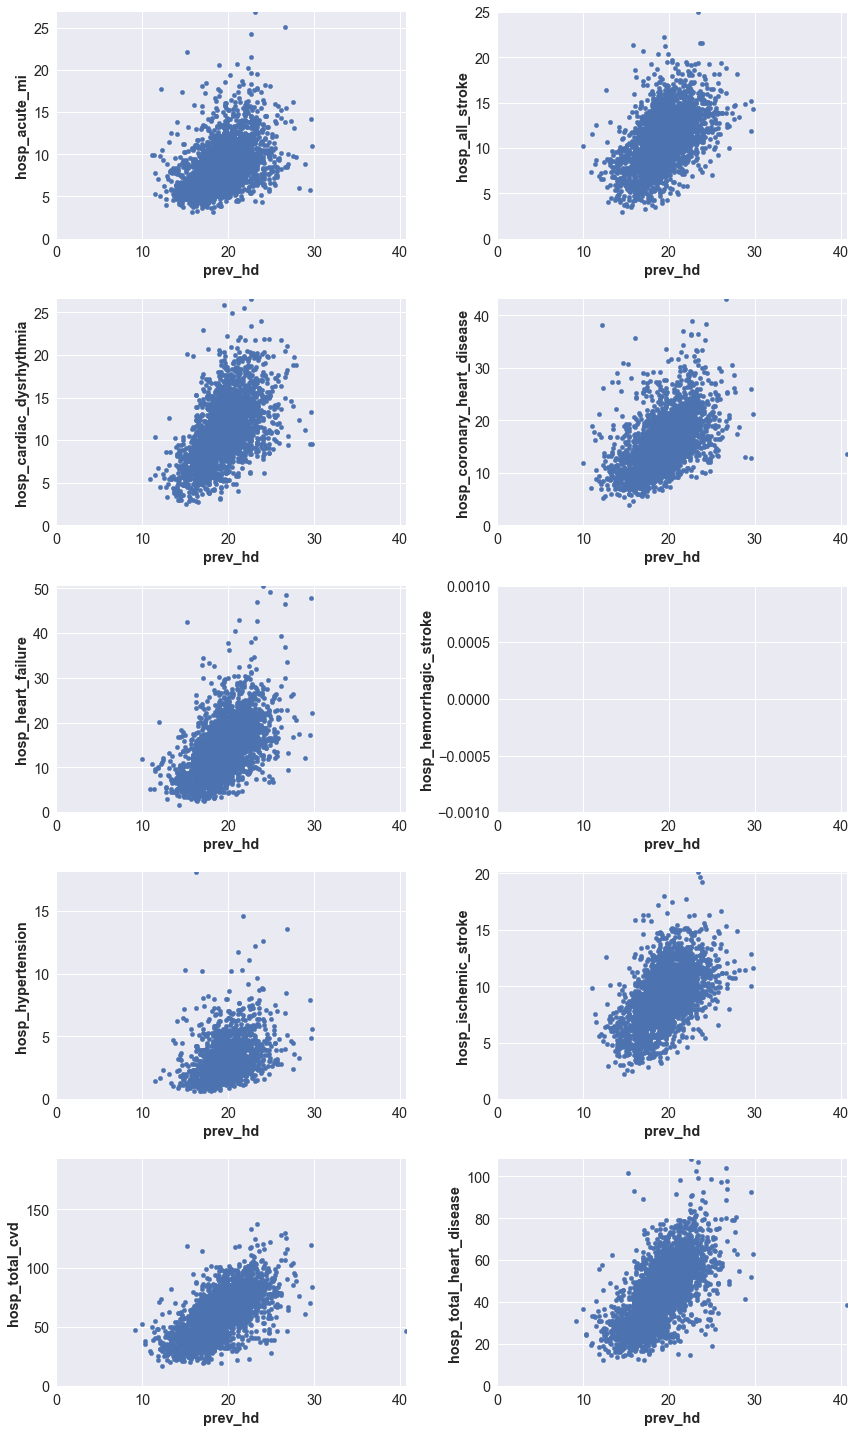

In [192]:
cs = [c for c in df.columns if c.startswith('hosp')]
n = len(cs) / 2
fig, axes = subplots(nrows=n, ncols=2, figsize=(12, 20))
axes = axes.flatten()
for i, c in enumerate(cs):
    df.plot.scatter(x='prev_hd', y=c, ax=axes[i])
    axes[i].set_xlim(0, max(df.prev_hd))
    axes[i].set_ylim(0, max(df[c]))
tight_layout()

In [194]:
df.prev_hd.describe()

count    3187.000000
mean       19.095795
std         2.780602
min         9.200000
25%        17.400000
50%        19.100000
75%        20.800000
max        40.700000
Name: prev_hd, dtype: float64

In [205]:
df.loc[df.state == 'MA', 'prev_hd'].describe()

count    14.000000
mean     18.942857
std       0.999010
min      17.100000
25%      18.350000
50%      18.850000
75%      19.700000
max      20.400000
Name: prev_hd, dtype: float64

In [209]:
df[df.state=='MA'].total_population.sum() - df.loc[df.state == 'MA', 'population_65+'].sum()

5702142.0939999996

In [199]:
df.total_population.sum()

317730976.0

# Training a Classifier

In [655]:
not_features = ['65_plus_percent', 'county_name', 'population_65+', 'state', 'total_population']
not_features += [c for c in df.columns if c.startswith('hosp')]

In [656]:
features = [c for c in df.columns if c not in not_features]

In [242]:
df_backup = df.copy()

In [241]:
df = df_backup

In [657]:
df[features].shape

(3225, 51)

In [658]:
df[features].describe()

,dm_prev_adj,ob_prev_adj,ltpia_prev_adj,no_hsdip,no_college,female_hd,foodstmp,home_val,income,GINI,...,total_cost,inp_cost,ou_cost,pac_cost,total_inc,inp_inc,ou_inc,pac_inc,prev_hd,log_pop
count,3215.000000,3137.000000,3137.000000,3215.000000,3215.000000,3215.000000,3137.000000,3214.000000,3136.000000,3137.000000,...,3225.000000,3225.000000,3225.000000,3225.000000,3225.000000,3225.000000,3225.000000,3225.000000,3187.000000,3215.000000
mean,9.751446,30.842238,24.704144,15.371540,79.867527,17.267558,15.906344,130.811139,47.063361,0.439790,...,18562.266977,5829.866047,3541.172093,4138.516899,10897.701395,3664.098295,1821.863256,2653.663256,19.095795,4.463104
std,2.320281,4.646627,4.959254,7.181171,8.859760,6.897932,7.927617,76.142753,12.106002,0.034569,...,5064.684783,2265.638460,1913.366983,2517.482669,3940.901530,2013.078396,1516.128207,2057.818563,2.780602,0.633348
min,3.800000,11.800000,8.400000,1.200000,24.900000,0.000000,0.100000,20.000000,21.600000,0.334000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,9.200000,1.863323
25%,8.100000,28.000000,21.400000,10.000000,76.300000,12.800000,10.100000,85.000000,38.800000,0.417000,...,16400.000000,5168.000000,2912.000000,3031.000000,9200.000000,3064.000000,1495.000000,1867.000000,17.400000,4.053520
50%,9.400000,31.000000,24.500000,13.700000,82.000000,16.100000,15.000000,109.150000,45.200000,0.437000,...,18635.000000,5978.000000,3472.000000,4020.000000,10917.000000,3763.000000,1834.000000,2593.000000,19.100000,4.416774
75%,11.200000,33.700000,28.000000,19.750000,86.000000,20.400000,20.500000,153.400000,52.500000,0.461000,...,20900.000000,6773.000000,4265.000000,5119.000000,12791.000000,4485.000000,2262.000000,3441.000000,20.800000,4.821516
max,20.800000,47.900000,39.800000,53.200000,97.300000,52.000000,60.600000,912.600000,125.600000,0.651000,...,44631.000000,22351.000000,12852.000000,20453.000000,37988.000000,20843.000000,11729.000000,19903.000000,40.700000,6.998878


##### Let's say any county with less than 10,000 pop is too small

In [659]:
df.total_population.describe()

count    3.215000e+03
mean     9.882768e+04
std      3.164549e+05
min      7.300000e+01
25%      1.131150e+04
50%      2.610800e+04
75%      6.630050e+04
max      9.974203e+06
Name: total_population, dtype: float64

In [660]:
df = df[df.total_population > 10000]
df.shape

(2521, 64)

##### Remove counties with no target values

In [661]:
df = df[~df[target].isnull()]
df.shape

(2517, 64)

##### Logistic Regression

In [699]:
df_train = df[features_personal].copy()
df_train = df_train.fillna(0)
del df_train['income']
del df_train['home_val']
df_train = df_train.replace(0, 1e-10).replace(1, 1 - 1e-10)
df_train = logit(df_train / 100)
features_used = df_train.columns.values

In [918]:
df_train = df[features_b].copy()
df_train = df_train.fillna(0)
df_train = df_train.replace(0, 1e-10).replace(1, 1 - 1e-10)
df_train = logit(df_train / 100)
features_used = df_train.columns.values

In [919]:
X = df_train.values
y = df[target].values

In [704]:
# imputer = Imputer(missing_values='NaN', strategy='mean')

# print X_train.shape
# print X_test.shape
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)
# print X_train.shape
# print X_test.shape

In [705]:
# scaler = StandardScaler()

# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


In [706]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

In [707]:
target = 'hosp_total_cvd'
y_train, y_test = train_test_split(df[target].values, test_size=0.2, random_state=666)

In [920]:
regr = LinearRegression()

In [921]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [922]:
y_pred = regr.predict(X)

In [923]:
from sklearn.metrics import mean_squared_error, r2_score

In [924]:
print "Mean squared error: %.2f" % mean_squared_error(y, y_pred)
print('Variance score: %.2f' % r2_score(y, y_pred))

Mean squared error: 179.86
Variance score: 0.38


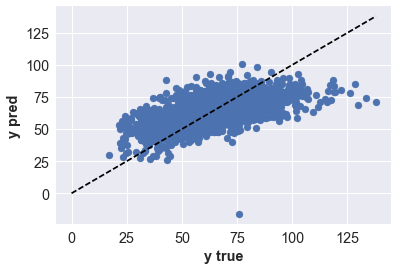

In [925]:
scatter(y, y_pred)
plot([0, max(y)], [0, max(y)], 'k--')
xlabel('y true')
ylabel('y pred')

In [926]:
coef = pd.DataFrame({'coef': regr.coef_, 'feature': features_used}).sort_values('coef', ascending=False)

In [927]:
coef

,coef,feature
1,36.719793,dm_prev_adj
2,2.520465,prev_hd
0,0.939365,povpct
3,0.488931,perc_black


In [928]:
df_train.describe()

,povpct,dm_prev_adj,prev_hd,perc_black
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,-2.388189,-2.225303,-1.446587,-4.304886
std,4.324863,0.255610,0.547693,5.077622
min,-27.631021,-3.231428,-27.631021,-27.631021
25%,-1.982994,-2.389200,-1.529957,-4.954821
50%,-1.658228,-2.242481,-1.424226,-3.547151
75%,-1.361479,-2.040656,-1.330964,-1.973626
max,0.088057,-1.337023,-0.856840,1.557539


##### correlation

In [616]:
from scipy.stats import pearsonr

In [761]:
x = {}
for i, f in enumerate(features_used):
    x[f] = pearsonr(X_train[:, i], y_train)[0]
pd.Series(x).sort_values(ascending=False)

dm_prev_adj             0.497930
no_college              0.404954
no_hsdip                0.364870
perc_black              0.303648
foodstmp                0.228167
povpct                  0.210864
ltpia_prev_adj          0.209075
ob_prev_adj             0.196296
prev_hd                 0.174305
income_div_by_1000      0.150990
unemploy                0.116477
perc_white              0.093016
perc_api               -0.053717
perc_aian              -0.065019
perc_hisp              -0.242450
home_val_div_by_1000   -0.404595
dtype: float64

# Taking only personally valid features

In [367]:
feature_descriptions={
    'dm_prev_adj': 'diabetis mellitus prevalence (age?) adjusted',
    'ob_prev_adj': 'obesity prevalence (age?) adjusted',
    'ltpia_prev_adj': 'leasure time physical inactivity prevalence (age?) adjusted',
    'female_hd': 'female_headed_households',
    'income': 'median household income',
    'home_val': 'median home value',
    'no_hsdip': 'no high school diploma',
    'no_college': 'no college education',
    'povpct': 'poverty percent',
    'perc_aian': 'american indians/alaskan natives',
    'perc_api': 'asian/pacific islanders',
    'sev_housing': 'severe housing problems',
    'NCHS_collapse': 'urban/rural status',
    'htnadh_*': 'blood pressure medicine (non-adherence?)',
    'duiradh': 'diuretics only (non-adherence?)',
    'rasadh': 'Renin-Angiotensin System medicine (non-adherence?)',
    'stg_*': 'hospital numbers',
    '*_dr': 'number of doctors',
    'pctui': 'health insurance status',
    'medicaid': 'percent medicaid eligible',
    '*_cost': 'for medicare patients with HD - total/inpatient/outpatient/post acute care costs',
    '*_inc': 'for medicare patients with HD - incremental costs'
}

TODO: Add age and gender by exporting from CDC atlas

In [598]:
features_personal = ['dm_prev_adj',
                     'ob_prev_adj',
                     'ltpia_prev_adj',
                     'no_hsdip',
                     'no_college',
                     'foodstmp',
                     'home_val',
                     'income',
                     'povpct',
                     'unemploy',
                     'perc_aian',
                     'perc_api',
                     'perc_black',
                     'perc_white',
                     'perc_hisp',
#                      'htnadh_all',
#                      'diuradh',
#                      'rasadh',
                     'prev_hd']

# race and gender

In [4]:
fns = glob('/Users/roee/work/cdc/tables/race_gender/hosp_cvd_*')
fns

['/Users/roee/work/cdc/tables/race_gender/hosp_cvd_black_female_2012_2014.csv',
 '/Users/roee/work/cdc/tables/race_gender/hosp_cvd_black_male_2012_2014.csv',
 '/Users/roee/work/cdc/tables/race_gender/hosp_cvd_hispanic_female_2012_2014.csv',
 '/Users/roee/work/cdc/tables/race_gender/hosp_cvd_hispanic_male_2012_2014.csv',
 '/Users/roee/work/cdc/tables/race_gender/hosp_cvd_white_female_2012_2014.csv',
 '/Users/roee/work/cdc/tables/race_gender/hosp_cvd_white_male_2012_2014.csv']

In [5]:
dfs = []
for fn in fns:
    if 'all_features' in fn:
        continue
    name = re.search(r'race_gender/hosp_(.*)_2012_2014', fn).group(1)
    df_ = pd.read_csv(fn, usecols=('cnty_fips', 'display_name', 'Value'), dtype={'Value': 'float'})
    df_ = df_.rename(columns={'display_name': 'county_name', 'Value': name, 'cnty_fips': 'fips'})
    df_ = df_.set_index('fips')
    dfs.append(df_)
df_race_gender = pd.concat(dfs, axis=1).T.drop_duplicates().T.replace(-1, nan)

In [6]:
df_race_gender.shape

(3225, 7)

In [7]:
no_data = df_race_gender.loc[:, df_race_gender.columns.str.startswith('cvd')].isnull().all(axis=1)
no_data = no_data[no_data].index

In [8]:
df_race_gender = df_race_gender.drop(no_data)

In [9]:
df_race_gender.shape

(3117, 7)

In [10]:
df_race_gender.head()

,county_name,cvd_black_female,cvd_black_male,cvd_hispanic_female,cvd_hispanic_male,cvd_white_female,cvd_white_male
fips,,,,,,,
1001,"""Autauga, (AL)""",60.1,106.7,NaN,NaN,61.2,76.3
1003,"""Baldwin, (AL)""",56.7,63.6,NaN,NaN,56.9,82.5
1005,"""Barbour, (AL)""",65.2,87.1,NaN,NaN,55.4,89.2
1007,"""Bibb, (AL)""",65.3,103.9,NaN,NaN,63.3,85.9
1009,"""Blount, (AL)""",NaN,NaN,NaN,NaN,64.5,78.8


### one hot encoding

In [16]:
dfs_ = []
for c in df_race_gender.columns:
    if not c.startswith('cvd'):
        continue
    df_ = pd.DataFrame(index=df_race_gender.index)
    df_['cvd_hosp'] = df_race_gender[c]
    df_[c.replace('cvd_', '')] = 1
    dfs_.append(df_)
df_ = pd.concat(dfs_, axis=0)
df_ = df_[~df_.cvd_hosp.isnull()]
df_ = df_.fillna(0)
df_.cvd_hosp = logit(df_.cvd_hosp / 1000) # original data in cases per 1000

In [17]:
df_.head()

,black_female,black_male,cvd_hosp,hispanic_female,hispanic_male,white_female,white_male
fips,,,,,,,
1001,1.0,0.0,-2.749764,0.0,0.0,0.0,0.0
1003,1.0,0.0,-2.811610,0.0,0.0,0.0,0.0
1005,1.0,0.0,-2.662873,0.0,0.0,0.0,0.0
1007,1.0,0.0,-2.661234,0.0,0.0,0.0,0.0
1011,1.0,0.0,-2.282294,0.0,0.0,0.0,0.0


In [18]:
imputer = Imputer(strategy='most_frequent') # essentially zeros

In [19]:
df_['bias'] = 1

In [20]:
from statsmodels.tools import add_constant

In [82]:
race_gender_features = ['black_female', 'black_male',
       'hispanic_female', 'white_female', 'hispanic_male', 'bias']
X = df_[race_gender_features].values
X = imputer.fit_transform(X)
# X = scaler.fit_transform(X)

y = df_.cvd_hosp.values
print X.shape, y.shape

(8830, 6) (8830,)


In [83]:
results = smf.OLS(y, X).fit()

results.summary(xname=race_gender_features, yname='cvd_hosp')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cvd_hosp   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     697.0
Date:                Wed, 30 Aug 2017   Prob (F-statistic):               0.00
Time:                        18:11:39   Log-Likelihood:                -3071.7
No. Observations:                8830   AIC:                             6155.
Df Residuals:                    8824   BIC:                             6198.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
black_female        0.1717      0.012     14.312      0.000       0.148       0.195
black_male          0.2656      0.012     21.664      0.000       0.242       0.290
hispanic_female    -0.1726      0.022     -7.825      0.000      -0.216      -0.129
white_female       -0.3313      0.009    -37.942      0.000      -0.348      -0.314
hispanic_male      -0.1046      0.022     -4.650      0.000      -0.149      -0.060
bias               -2.6082      0.006   -424.081      0.000      -2.620      -2.596
==============================================================================
Omnibus:                      392.138   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              485.731
Skew:                          -0.476   Prob(JB):                    3.35e-106
Kurtosis:                       3.643   Cond. No.                         7.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
conf = pd.DataFrame(results.conf_int(), index=race_gender_features, columns=('low', 'high'))
conf['coef'] = pd.Series(results.params, index=race_gender_features)
conf.loc['white_male'] = (0.060499, 0.148678, 0.104588) #from another run with white_male instead of hispanic_male
conf

,low,high,coef
black_female,0.148193,0.195231,0.171712
black_male,0.241524,0.289580,0.265552
hispanic_female,-0.215777,-0.129327,-0.172552
white_female,-0.348390,-0.314160,-0.331275
hispanic_male,-0.148678,-0.060499,-0.104588
bias,-2.620243,-2.596132,-2.608188
white_male,0.060499,0.148678,0.104588


In [81]:
conf.to_pickle('/Users/roee/work/cdc/output/race_gender_coefs.pickle')

In [79]:
reference = 'white_male'
for val, row in conf.iterrows():
    if val in ('bias', reference):
        continue
    bias = conf.loc['bias', 'coef']
    ref = expit(conf.loc[reference, 'coef'] + bias)
    x = (expit(row.loc['coef'] + bias) - ref) * 100
    x_l = (expit(row.loc['low'] + bias) - ref) * 100
    x_h = (expit(row.loc['high'] + bias) - ref) * 100
    print '{} is {:.1f}% ({:.1f}% to {:.1f}%) more likely than {}'.format(val, x, x_l, x_h, reference)

black_female is 1.2% (0.8% to 1.5%) more likely than white_male
black_male is 1.9% (1.5% to 2.3%) more likely than white_male
hispanic_female is -1.0% (-1.3% to -0.7%) more likely than white_male
white_female is -1.8% (-2.0% to -1.6%) more likely than white_male


In [86]:
ratios = expit(conf.coef + conf.loc['bias', 'coef']) / expit(conf.loc['white_male', 'coef'] + conf.loc['bias', 'coef'])
ratios

black_female       1.063844
black_male         1.159334
hispanic_female    0.772078
white_female       0.664455
hispanic_male      0.822997
bias               0.071392
white_male         1.000000
Name: coef, dtype: float64

In [87]:
ratios.to_pickle('/Users/roee/work/cdc/output/race_gender_ratios.pickle')

# --------------

In [4]:
fns = glob('/Users/roee/work/cdc/tables/*csv')
fns

['/Users/roee/work/cdc/tables/65_plus_percent_2012_2014.csv',
 '/Users/roee/work/cdc/tables/all_features_2012_2014.csv',
 '/Users/roee/work/cdc/tables/hosp_acute_mi_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_all_stroke_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_cardiac_dysrhythmia_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_coronary_heart_disease_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_heart_failure_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_hemorrhagic_stroke_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_hypertension_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_ischemic_stroke_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_total_cvd_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/hosp_total_heart_disease_2012_2014_65_plus.csv',
 '/Users/roee/work/cdc/tables/total_population_2012_2014.csv']

In [5]:
dfs = []
for fn in fns:
    if 'all_features' in fn:
        continue
    name = re.search(r'tables/(.*)_2012_2014', fn).group(1)
    df = pd.read_csv(fn, usecols=('cnty_fips', 'display_name', 'Value'))
    df = df.rename(columns={'display_name': 'county_name', 'Value': name, 'cnty_fips': 'fips'})
    df = df.set_index('fips')
    dfs.append(df)

In [6]:
x = pd.read_csv('/Users/roee/work/cdc/tables/all_features_2012_2014.csv')
x = x.rename(columns={'display_name': 'county_name', 'cnty_fips': 'fips'})
del x['Value']
del x['theme_range']
x = x.set_index('fips')
dfs.append(x)

In [7]:
df = pd.concat(dfs, axis=1).T.drop_duplicates().T
df = df.replace(-1, nan)

for c in df.columns:
    if c == 'county_name':
        continue
    df[c] = df[c].astype('float')

In [8]:
df['bias'] = 1

In [9]:
df.shape

(3225, 64)

In [10]:
df = df[df.total_population > 10000]
df.shape

(2521, 64)

In [11]:
df = df[~df.hosp_total_cvd.isnull()]
df.shape

(2517, 64)

In [12]:
df = df[~df.hosp_acute_mi.isnull()]
df.shape

(2456, 64)

In [13]:
features_b = ['povpct', 'dm_prev_adj', 'no_hsdip', 'prev_hd', 'bias']
# features_b = ['dm_prev_adj', 'bias']

In [14]:
df[features_b].describe()

,povpct,dm_prev_adj,no_hsdip,prev_hd,bias
count,2408.000000,2456.000000,2456.000000,2455.000000,2456.0
mean,16.960382,9.951140,15.361726,19.413198,1.0
std,6.189771,2.220911,6.845455,2.489233,0.0
min,3.200000,3.800000,2.500000,11.100000,1.0
25%,12.500000,8.400000,10.200000,17.800000,1.0
50%,16.300000,9.600000,14.100000,19.400000,1.0
75%,20.500000,11.400000,19.700000,21.000000,1.0
max,52.200000,19.400000,53.200000,29.800000,1.0


In [15]:
imputer = Imputer(strategy='mean')

X2 = df[features_b].values 
X2 = imputer.fit_transform(X2)

y2 = logit(df.hosp_total_cvd / 1000).values

print X2.shape, y2.shape

results2 = smf.OLS(y2, X2).fit()
results2.summary(xname=features_b, yname='cvd_hosp')

(2456, 5) (2456,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cvd_hosp   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     656.1
Date:                Sat, 23 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:23:07   Log-Likelihood:                 365.60
No. Observations:                2456   AIC:                            -721.2
Df Residuals:                    2451   BIC:                            -692.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
povpct          0.0029      0.001      3.047      0.002       0.001       0.005
dm_prev_adj     0.0292      0.003     11.450      0.000       0.024       0.034
no_hsdip        0.0018      0.001      2.007      0.045    4.01e-05       0.003
prev_hd         0.0679      0.002     37.037      0.000       0.064       0.071
bias           -4.3963      0.034   -129.376      0.000      -4.463      -4.330
==============================================================================
Omnibus:                      241.401   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.744
Skew:                          -0.703   Prob(JB):                     3.16e-86
Kurtosis:                       4.369   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
df[features_b].mean()

povpct         16.960382
dm_prev_adj     9.951140
no_hsdip       15.361726
prev_hd        19.413198
bias            1.000000
dtype: float64

In [160]:
df[features_b].describe()

,povpct,dm_prev_adj,no_hsdip,prev_hd,bias
count,2408.000000,2456.000000,2456.000000,2455.000000,2456.0
mean,16.960382,9.951140,15.361726,19.413198,1.0
std,6.189771,2.220911,6.845455,2.489233,0.0
min,3.200000,3.800000,2.500000,11.100000,1.0
25%,12.500000,8.400000,10.200000,17.800000,1.0
50%,16.300000,9.600000,14.100000,19.400000,1.0
75%,20.500000,11.400000,19.700000,21.000000,1.0
max,52.200000,19.400000,53.200000,29.800000,1.0


In [17]:
confs_ = pd.DataFrame(results2.conf_int(), index=features_b, columns=('low', 'high'))
confs_['coef'] = pd.Series(results2.params, index=features_b)
confs_

,low,high,coef
povpct,0.001045,0.004819,0.002932
dm_prev_adj,0.024176,0.034168,0.029172
no_hsdip,0.000040,0.003464,0.001752
prev_hd,0.064278,0.071465,0.067872
bias,-4.462970,-4.329700,-4.396335


In [18]:
confs_.to_pickle('/Users/roee/work/cdc/output/linear_regression_1.pickle')

In [19]:
df[features_b].mean().to_pickle('/Users/roee/work/cdc/output/counties_mean.pickle')

In [20]:
print 'for an average county', expit((confs_.coef * df[features_b].mean()).sum())

for an average county 0.0622813892511


In [21]:
expit(confs_.loc['bias', 'coef'])

0.012172429053750296

In [22]:
expit(confs_.coef.sum())

0.013458338310919617

In [23]:
logit(df.hosp_total_cvd.mean() / 1000)

-2.6746737203330668

In [27]:
# for reference in confs_.index:
#     if reference == 'bias':
#         continue
#     bias = confs_.loc['bias', 'coef']
#     positives = confs_[confs_.coef > 0].index.values
#     positives = set(positives).difference(('bias', reference))
#     negatives = confs_[confs_.coef < 0].index.values
#     negatives = set(negatives).difference(('bias', reference))
    
#     highest_with = expit(sum(confs_.loc[positives, 'coef']) + \
#                     confs_.loc[reference, 'coef'] + bias)
#     highest_without = expit(sum(confs_.loc[positives, 'coef']) + bias)
    
#     lowest_with = expit(sum(confs_.loc[negatives, 'coef']) + \
#                         confs_.loc[reference, 'coef'] + bias)
#     lowest_without = expit(sum(confs_.loc[negatives, 'coef']) + bias)
 
#     print reference
#     print '{:.2f}% difference ({:.2f}%, {:.2f}%) between {} + itself versus those without it'.format(
#         100.0 * (highest_with - highest_without), 100 * highest_with, 100 * highest_without, list(positives))
#     print '{:.2f}% difference ({:.2f}%, {:.2f}%) between {} + itself versus those without it'.format(
#         100.0 * (lowest_with - lowest_without), 100 * lowest_with, 100 * lowest_without, list(negatives))
#     print

In [40]:
df.hosp_total_cvd.mean()

63.970480731028999

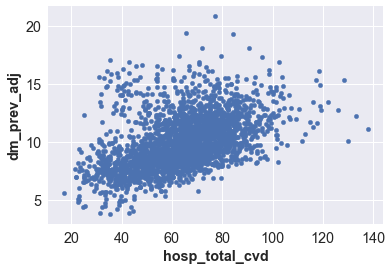

In [41]:
df.plot.scatter(x='hosp_total_cvd', y='dm_prev_adj')

# Ok, down to business

In [24]:
print '\n'.join(df.columns)

county_name
65_plus_percent
hosp_acute_mi
hosp_all_stroke
hosp_cardiac_dysrhythmia
hosp_coronary_heart_disease
hosp_heart_failure
hosp_hemorrhagic_stroke
hosp_hypertension
hosp_ischemic_stroke
hosp_total_cvd
hosp_total_heart_disease
total_population
dm_prev_adj
ob_prev_adj
ltpia_prev_adj
no_hsdip
no_college
female_hd
foodstmp
home_val
income
GINI
povpct
unemploy
perc_aian
perc_api
perc_black
perc_white
perc_hisp
airqual
PARKS
sev_housing
NCHS_collapse
htnadh_all
htnadh_white
htnadh_black
htnadh_api
htnadh_aian
htnadh_hisp
diuradh
rasadh
stg_hosp
stg_int_cr
stg_rehab
stg_emerg
stg_neuro
pharmpc
prim_dr
cvd_dr
neuro_dr
surg_dr
pctui
medicaid
total_cost
inp_cost
ou_cost
pac_cost
total_inc
inp_inc
ou_inc
pac_inc
prev_hd
bias


In [73]:
groups = [['no_hsdip', 'no_college'], 
          ['foodstmp', 'povpct', 'unemploy'], 
          ['dm_prev_adj', 'ob_prev_adj', 'ltpia_prev_adj'],
         ['prev_hd'],
         ['bias']]

In [66]:
from itertools import product

In [74]:
list(product(*groups))

[('no_hsdip', 'foodstmp', 'dm_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'foodstmp', 'ob_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'foodstmp', 'ltpia_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'povpct', 'dm_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'povpct', 'ob_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'povpct', 'ltpia_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'unemploy', 'dm_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'unemploy', 'ob_prev_adj', 'prev_hd', 'bias'),
 ('no_hsdip', 'unemploy', 'ltpia_prev_adj', 'prev_hd', 'bias'),
 ('no_college', 'foodstmp', 'dm_prev_adj', 'prev_hd', 'bias'),
 ('no_college', 'foodstmp', 'ob_prev_adj', 'prev_hd', 'bias'),
 ('no_college', 'foodstmp', 'ltpia_prev_adj', 'prev_hd', 'bias'),
 ('no_college', 'povpct', 'dm_prev_adj', 'prev_hd', 'bias'),
 ('no_college', 'povpct', 'ob_prev_adj', 'prev_hd', 'bias'),
 ('no_college', 'povpct', 'ltpia_prev_adj', 'prev_hd', 'bias'),
 ('no_college', 'unemploy', 'dm_prev_adj', 'prev_hd', 'bias'),
 ('no_c

In [75]:
imputer = Imputer(strategy='mean')

In [76]:
confs = []
for feature_list in product(*groups):
    X2 = df[list(feature_list)].values 
    X2 = imputer.fit_transform(X2)

    y2 = logit(df.hosp_total_cvd / 1000).values

    results2 = smf.OLS(y2, X2).fit()
    confs_ = pd.DataFrame(results2.conf_int(), index=feature_list, columns=('low', 'high'))
    confs_['coef'] = pd.Series(results2.params, index=feature_list)
    confs.append(confs_)

In [77]:
len(confs)

18

In [31]:
confs[0]

,low,high,coef
no_hsdip,-0.000799,0.002491,0.000846
foodstmp,0.003376,0.006611,0.004993
dm_prev_adj,0.020883,0.031044,0.025963
prev_hd,0.063792,0.070949,0.067371
bias,-4.440660,-4.307744,-4.374202


In [32]:
means = df

In [33]:
res = pd.concat(confs, axis=0, join='outer')

In [34]:
final = pd.DataFrame(index=res.index.unique())
final['mean'] = res.groupby(level=0).mean().coef
final['std'] = res.groupby(level=0).std().coef

In [35]:
final

,mean,std
no_hsdip,0.002524,0.001290
foodstmp,0.006207,0.001113
dm_prev_adj,0.029706,0.002968
prev_hd,0.067405,0.002143
bias,-4.397277,0.074401
ob_prev_adj,0.009933,0.001427
ltpia_prev_adj,0.013297,0.001697
povpct,0.004395,0.001402
unemploy,0.007493,0.006423
no_college,-0.000699,0.001054


In [36]:
x = final.drop('bias')

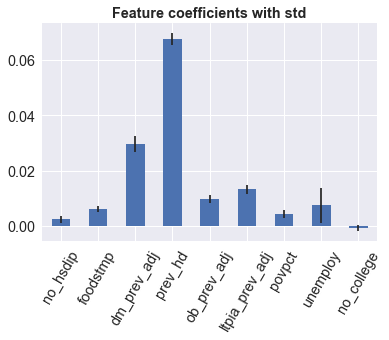

In [37]:
x['mean'].plot.bar(yerr=x['std'], rot=60)
title('Feature coefficients with std')

In [38]:
final = final.drop('unemploy')

##### The features' mean in the counties

In [39]:
county_median = df[final.index].median()
county_median

no_hsdip          14.10
foodstmp          15.80
dm_prev_adj        9.60
prev_hd           19.40
bias               1.00
ob_prev_adj       31.20
ltpia_prev_adj    24.70
povpct            16.30
no_college        81.65
dtype: float64

In [40]:
percentiles = {f:[percentile(df[~df[f].isnull()][f], p) for p in xrange(101)] for f in final.index}

In [86]:
class LordOfRegressions(object):
    def __init__(self, regression_results, feature_medians, feature_percentiles):
        self._regressions = regression_results
        self.medians = feature_medians
        self._percentiles = feature_percentiles

    def _logodds_mean_std(self, feature_values):
        res_in_logodds = []
        for reg_res in self._regressions:
            features_here = reg_res.index.values
            # the sum ignores nans (features not used in this regression)
            res_in_logodds.append((reg_res.coef * feature_values).sum()) 
        logodds_mean = np.array(res_in_logodds).mean()
        logodds_std = np.array(res_in_logodds).std()
        return logodds_mean, logodds_std
    
    def use_all_regressions_by_percentile(self, percentiles):
        if isinstance(percentiles, dict):
            percentiles = pd.Series(percentiles)     
        values = {k: self._percentiles[k][v] for k, v in percentiles.iteritems()}
        return self.use_all_regressions(values)

    def use_all_regressions(self, provided_features):
        if isinstance(provided_features, dict):
            provided_features = pd.Series(provided_features)

        # start with the medians (bias included)
        x = self.medians.copy()

        # plug in the values for the subset of the provided features
        for f, v in provided_features.iteritems():
            x.loc[f] = v

        # Run all the regressions with provided features
        logodds_user_mean, logodds_user_std = self._logodds_mean_std(x)

        # Run all the regressions with median values
        logodds_median_mean, logodds_median_std = self._logodds_mean_std(self.medians)

        # reference (disregard std?)
        median_percent = expit(logodds_median_mean)

        predicted_exact = expit(logodds_user_mean)
        predicted_high = expit(logodds_user_mean + logodds_user_std)
        predicted_low = expit(logodds_user_mean - logodds_user_std)

        ratio = predicted_exact / median_percent
        ratio_high = predicted_high / median_percent
        ratio_low = predicted_low / median_percent

        return ratio, ratio_high, ratio_low
    
lord_of_regressions = LordOfRegressions(confs, county_median, percentiles)

In [87]:
lord_of_regressions.use_all_regressions({'povpct': percentiles['povpct'][-1]})

(1.0505517454672271, 1.1450558031427387, 0.96335554230914511)

In [89]:
lord_of_regressions.use_all_regressions_by_percentile({'povpct': 100})

(1.0505517454672271, 1.1450558031427387, 0.96335554230914511)

In [90]:
pickle.dump(lord_of_regressions, open('/Users/roee/work/cdc/output/lord_of_regressions.pickle', 'w'))

In [64]:
pickle.dump(percentiles, open('/Users/roee/work/cdc/output/feature_percentiles.pickle', 'w'))